# Customer Churn Prediction 2020

Public score: 0.98222

In [57]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!pip list | grep mlfoundry

mlfoundry             0.3.13


# Load data into pandas dataframe

In [58]:
df = pd.read_csv('train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [60]:
from getpass import getpass
api_token = getpass("TrueFoundry API Token:")

TrueFoundry API Token:········


In [61]:
import mlfoundry as mlf
mlf_api = mlf.get_client(api_key=api_token)

[mlfoundry] 2022-05-11T07:33:16-0700 INFO API key is not present. Using existing tracking token


# cleaning the data 
* first calculate the total_net_minutes to reduce the number of features; we are going to do the same with calls, and charge 
* second we are going to convert all yes, no strings into ints such as in columns (voice_mail_plan, international_plan, and churn)
* then we are going to convert the categorical values into onehote vectors such as (state, and area_code)
* lastly drop all repeted features and useless columns such as area (code and state)   


In [62]:
def clean_Data(df):    
    df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


    df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
    df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 

    df.drop(columns= ['state', 'area_code'], inplace= True)
    #df.area_code = pd.Categorical(df.area_code).codes



    df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
    return df



In [63]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# spliting the data 
* we are going to use sklearn to split the data 
* first we need to split the dataframe into x, y 
* then use train-test-spilt function to split the data 
* use random state to have same data each time you run the program 
* use stratify to cut the data with the same portion


In [64]:
from sklearn.model_selection import train_test_split 

X = df.drop(columns= ['churn'])
y = df['churn']

x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=.25, stratify= y, random_state=1) 
y_train.value_counts(), y_val.value_counts()

(no     2739
 yes     448
 Name: churn, dtype: int64,
 no     913
 yes    150
 Name: churn, dtype: int64)

# preform the cleaing by calling the clean function 

In [65]:
x_train  = clean_Data(x_train)
y_train = pd.Categorical(y_train).codes

x_val  = clean_Data(x_val)
y_val= pd.Categorical(y_val).codes

print(df.international_plan.value_counts())
df.head()

/var/folders/8b/f7t1m91s2q16g3kfw85z5pkh0000gn/T/ipykernel_5553/1435809804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
/var/folders/8b/f7t1m91s2q16g3kfw85z5pkh0000gn/T/ipykernel_5553/1435809804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
/var/folders/8b/f7t1m91s2q16g3kfw85z5pkh0000gn/T/ipykernel

no     3854
yes     396
Name: international_plan, dtype: int64


/var/folders/8b/f7t1m91s2q16g3kfw85z5pkh0000gn/T/ipykernel_5553/1435809804.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# display all numerical columns in the data

[mlfoundry] 2022-05-11T07:33:30-0700 INFO Shutting down background jobs and syncing data for run with id '6e1737c2236f4c679ae1bd0952bce537', please don't kill this process...


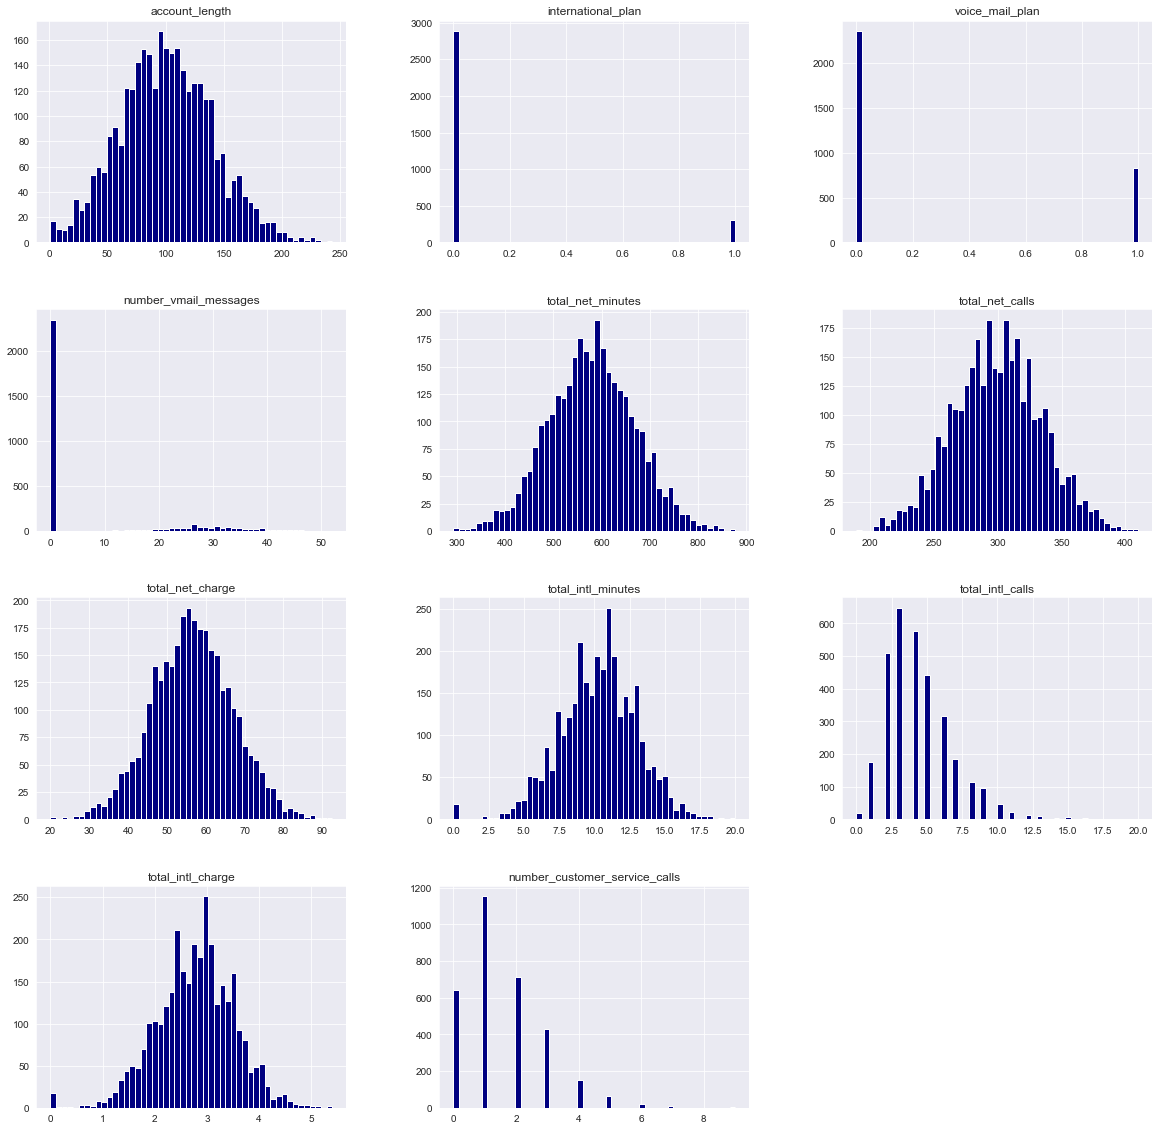

In [66]:
!pip install seaborn
import seaborn as sns
sns.set_style('dark')
temp = x_train[['account_length', 'international_plan','voice_mail_plan', 'number_vmail_messages', 
           'total_net_minutes','total_net_calls', 'total_net_charge','total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','number_customer_service_calls' ]]
temp.hist(bins=50,figsize=(20,20),color='navy');

# create some models 

## first we start with simple model such as LogisticRegression 
* it preform well but not the best 

In [67]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression(max_iter=300,)
lr .fit(x_train,y_train )
lr .score(x_train, y_train)

/Users/cusgadmin/work/deepL/mlf-test/mlftest_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8688421713209915

In [68]:
pre = lr .predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.8560677328316086

In [69]:
mlf_run = mlf_api.create_run(project_name='customer-churn-kaggle-project', run_name='logistic-regression')

mlf_run.log_dataset(
    dataset_name = 'raw_dataset',
    features = df,
    only_stats = False,   
)

mlf_run.log_dataset(
    dataset_name = 'train',
    features = x_train,
    predictions = lr.predict(x_train),
    actuals = y_train,
    only_stats = False,   
)

mlf_run.log_dataset(
    dataset_name = 'val',
    features = x_val,
    predictions = lr.predict(x_val),
    actuals = y_val,
    only_stats = False,   
)


mlf_run.log_metrics({'score': score})
mlf_run.log_model(lr, framework=mlf.ModelFramework.SKLEARN)
mlf_run.log_params(lr.get_params())



[mlfoundry] 2022-05-11T07:34:03-0700 INFO Run is created with id '653e341d65aa48488511e95ccc928aad' and name 'logistic-regression'
[mlfoundry] 2022-05-11T07:34:04-0700 INFO Shutting down background jobs and syncing data for run with id '0742b0958ef14d72b4e3e0768bbdf2ee', please don't kill this process...
[mlfoundry] 2022-05-11T07:35:30-0700 INFO Metrics logged successfully
[mlfoundry] 2022-05-11T07:35:47-0700 INFO Model logged successfully
[mlfoundry] 2022-05-11T07:35:48-0700 INFO Parameters logged successfully


## Frist we start with RandomForestClassifier 
**then we use the random forest classifier** 

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train )
clf.score(x_train, y_train)

0.9996862252902416

In [82]:
p = x_val.head(1).to_json()
p_df = pd.read_json(p)
p_df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
1451,100,0,0,0,7.1,4,1.92,1,397.4,220,36.82


[mlfoundry] 2022-05-11T10:56:14-0700 WARNING pid=20 thread=MLFSenderThread:9246b5919f2b435597bbf5f9927413b4 Encountered an internal error while trying to consume: API request to https://mlf-server.tfy-ctl-euwe1-devtest.devtest.truefoundry.tech/api/2.0/mlflow/runs/log-batch failed with exception HTTPSConnectionPool(host='mlf-server.tfy-ctl-euwe1-devtest.devtest.truefoundry.tech', port=443): Max retries exceeded with url: /api/2.0/mlflow/runs/log-batch (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
[mlfoundry] 2022-05-11T10:56:14-0700 WARNING pid=20 thread=MLFSenderThread:52465947b14a44e2a94d7fdbf2079bdc Encountered an internal error while trying to consume: API request to https://mlf-server.tfy-ctl-euwe1-devtest.devtest.truefoundry.tech/api/2.0/mlflow/runs/log-batch failed with exception HTTPSConnectionPool(host='mlf-server.tfy-ctl-euwe1-devtest.devtest.truefoundry.tech', port=443): Max retries exceeded with url: /ap

In [ ]:
def new_predict():
    

In [71]:
pre = clf.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9764816556914393

In [72]:
mlf_run = mlf_api.create_run(project_name='customer-churn-kaggle-project', run_name='random-forest')

mlf_run.log_dataset(
    dataset_name = 'raw_dataset',
    features = df,
    only_stats = False,   
)

mlf_run.log_dataset(
    dataset_name = 'train',
    features = x_train,
    predictions = lr.predict(x_train),
    actuals = y_train,
    only_stats = False,   
)

mlf_run.log_dataset(
    dataset_name = 'val',
    features = x_val,
    predictions = lr.predict(x_val),
    actuals = y_val,
    only_stats = False,   
)


mlf_run.log_metrics({'score': score})
mlf_run.log_model(clf, framework=mlf.ModelFramework.SKLEARN)
mlf_run.log_params(clf.get_params())


[mlfoundry] 2022-05-11T07:36:04-0700 INFO Run is created with id '52465947b14a44e2a94d7fdbf2079bdc' and name 'random-forest'
[mlfoundry] 2022-05-11T07:36:27-0700 INFO Shutting down background jobs and syncing data for run with id '653e341d65aa48488511e95ccc928aad', please don't kill this process...
[mlfoundry] 2022-05-11T07:37:37-0700 INFO Metrics logged successfully
[mlfoundry] 2022-05-11T07:38:04-0700 INFO Model logged successfully
[mlfoundry] 2022-05-11T07:38:05-0700 INFO Parameters logged successfully


## lasly we used  GradientBoostingClassifier


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(x_train,y_train )
xg.score(x_train, y_train)

0.9996862252902416

In [74]:
pre = xg.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9774223894637818

In [75]:
mlf_run = mlf_api.create_run(project_name='customer-churn-kaggle-project', run_name='xgboost')

mlf_run.log_dataset(
    dataset_name = 'raw_dataset',
    features = df,
    only_stats = False,   
)

mlf_run.log_dataset(
    dataset_name = 'train',
    features = x_train,
    predictions = lr.predict(x_train),
    actuals = y_train,
    only_stats = False,   
)

mlf_run.log_dataset(
    dataset_name = 'val',
    features = x_val,
    predictions = lr.predict(x_val),
    actuals = y_val,
    only_stats = False,   
)


mlf_run.log_metrics({'score': score})
mlf_run.log_model(xg, framework=mlf.ModelFramework.SKLEARN)
mlf_run.log_params(xg.get_params())



[mlfoundry] 2022-05-11T07:40:02-0700 INFO Run is created with id '9246b5919f2b435597bbf5f9927413b4' and name 'xgboost'


KeyboardInterrupt: 

In [51]:
x_train.shape, y_train.shape, lr.predict(x_train).shape

((3187, 11), (3187,), (3187,))

# loading the test data 

In [52]:
test = pd.read_csv('test.csv')
x_test =test.drop(columns='id')

# Test cleaning 
**clean the test data using the same function we used for train data cleaning**

In [53]:
x_test = clean_Data(x_test)
x_test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96


# use model to predict the values 
## first use the xg boost to predict the test values 
After we use the model to predict the data we save the values in csv file to use in the submission 

In [54]:
pre = xg.predict(x_test)
print(pre[:5])
ansXG = pd.read_csv('../input/customer-churn-prediction-2020/sampleSubmission.csv')
ansXG.churn = pre
ansXG.churn= ansXG.churn.map({ 1: 'yes', 0 : 'no'}) 
ansXG.to_csv('sampleSubmissionXG.csv', index=False)
ansXG.head()

[0 0 0 0 0]


FileNotFoundError: [Errno 2] No such file or directory: '../input/customer-churn-prediction-2020/sampleSubmission.csv'

## then use the randomforest 


In [ ]:
pre = clf.predict(x_test)
print(pre[:5])
ansCLF = pd.read_csv('../input/customer-churn-prediction-2020/sampleSubmission.csv')
ansCLF.churn = pre
ansCLF.churn= ansCLF.churn.map({ 1: 'yes', 0 : 'no'}) 
ansCLF.to_csv('sampleSubmissionCLF.csv', index=False)
ansCLF.head()

**to check which one will be better for the data but both have the same accuracy value**

# model saving
Using joblib to dump the models into joblib files with the model name 

In [ ]:
from joblib import dump
dump(clf, 'clf.joblib') 
dump(xg, 'xg.joblib') 